# Unsupervised Learning with Clustering

Clustering is a form of unsupervised learning, in that we do not have a target variable to train the data on. We only have a feature matrix of inputs with which to form groupings

In this exercise, I will start with K-Means, a common clustering technique. I'll then do some model evaluation before looking at how scaling affects the results. I'll finish up with some density based clustering. The dataset to be used contains information about various beers

---

Ok, let's start by importing the required libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Bring in the beer dataset

In [2]:
beer = pd.read_csv('data/beer.csv', sep = ' ')
beer.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


I won't need the beer names so I'll drop those for the feature matrix X

In [3]:
X = beer.drop('name', axis = 1)

---

## K-Means

Here I initiate and fit a K-Means model

In [4]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Then I obtain the predicted labels and add to the beer dataframe

In [5]:
beer['cluster'] = km.labels_
beer.sort_values(by = 'cluster', ascending = True)

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
10,Coors,140,18,4.6,0.44,0


A quick look through the table shows that the clusters are probably arranged according to calories, rather than by sodium, alcohol or cost

We can perform some exploratory data analysis using the groupby function

In [6]:
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,70.00,10.5,2.600000,0.420000
2,102.75,10.0,4.075000,0.440000


At this point it would be useful to do some plotting to visualise the clusters

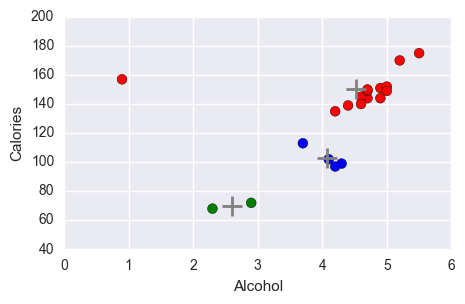

In [7]:
# set up chart parameters and create a colour palette for the clusters
plt.rcParams['font.size'] = 14
plt.figure(figsize = (5,3))
colors = np.array(['red', 'green', 'blue', 'yellow'])

# create a scatter plot of calories versus alcohol, colored by cluster
plt.scatter(beer.alcohol, beer.calories, c = colors[beer.cluster], s = 50)

# also plot the cluster centers
plt.scatter(centers.alcohol, centers.calories, linewidths = 2, marker = '+', s = 200, c = 'grey')

# add labels
plt.xlabel('Alcohol')
plt.ylabel('Calories')

We can also create a matrix of scatter plots. This can be useful as you can quickly run your eye over the various charts and identify any interesting patterns

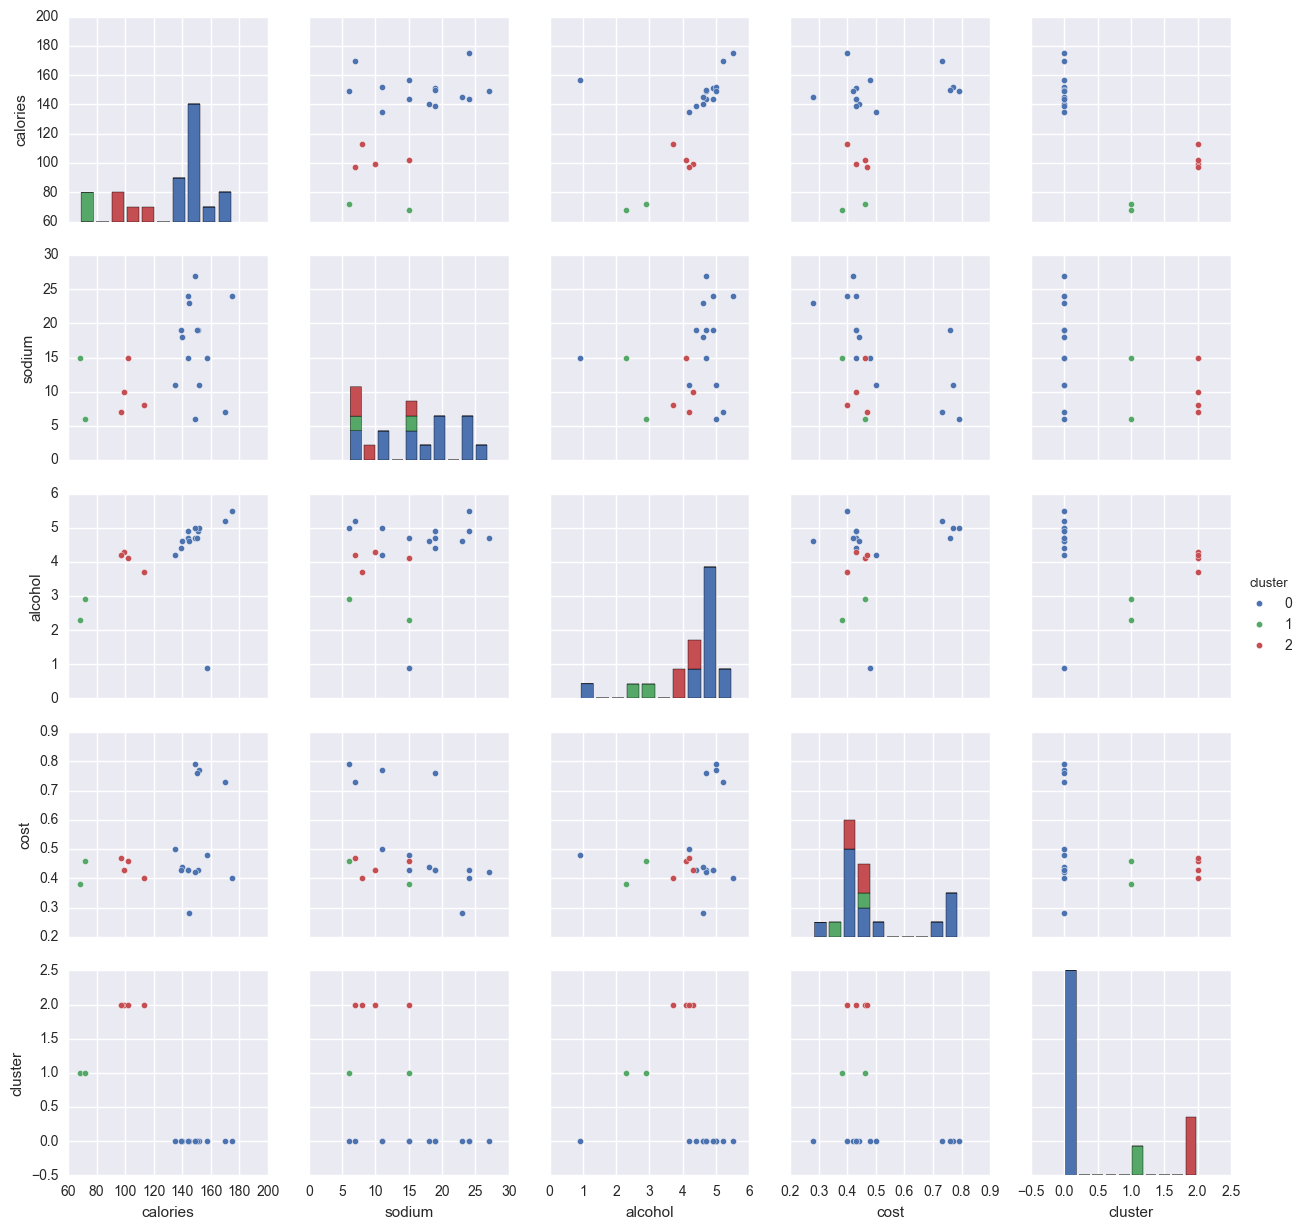

In [8]:
sns.pairplot(beer, hue = 'cluster')

---

## Performance Evaluation

To evaluate clustering performance we can use the Silhouette Coefficient. We define it as

Silhouette Coefficient = $ \frac{b - a}{max(a,b)} $

It is performed for each data point where
* a is the mean distance to all other points in it's *own* cluster
* b is the mean distance to all other points in the *next nearest* cluster

We get the **global** score by taking the mean of all the individual scores

In [9]:
print 'Silhouette Score is', silhouette_score(X, km.labels_).round(3)

Silhouette Score is 0.673


Let's see how the Silhouette Score evolves with the number of clusters

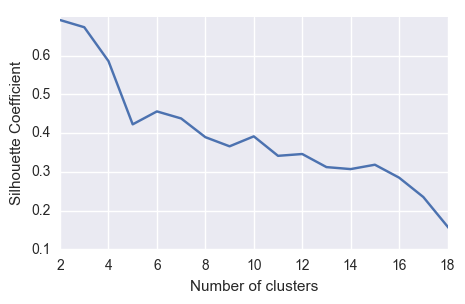

In [10]:
# get the results using a for loop
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(X)
    scores.append(silhouette_score(X, km.labels_))
    
# plot the results
plt.figure(figsize = (5,3))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.xlim(2, 18)
plt.ylim(0.1, 0.7)
plt.show()

The chart suggests that the silhouette score is maximised with 2 clusters

---

## Scaling the data

Earlier we saw how the clustering broadly followed calorific content rather than sodium, alcohol content or cost. This might have been because the absolute values for calories were greater than for the other feature columns. To address this I'll scale the data and see how that performs instead. First, I use the Standard Scaler to scale the feature matrix

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Then I run through the same steps as before

In [12]:
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [13]:
beer['cluster'] = km.labels_
beer.sort_values(by = 'cluster', ascending = True)

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


We see now that the clusters are more evenly spread - there are fewer 0's and more 1's

In [14]:
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,148.375,21.125,4.7875,0.4075
1,105.375,10.875,3.3250,0.4475
2,155.250,10.750,4.9750,0.7625


In [15]:
print 'Silhouette Score is', silhouette_score(X_scaled, km.labels_).round(3)

Silhouette Score is 0.458


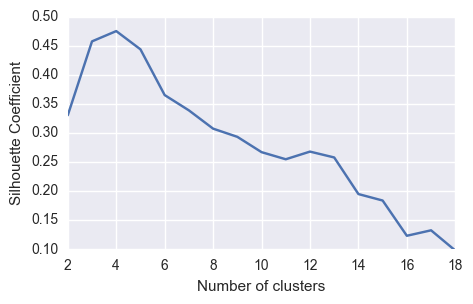

In [16]:
# get the results using a for loop
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(X_scaled)
    scores.append(silhouette_score(X_scaled, km.labels_))
    
# plot the results
plt.figure(figsize = (5,3))
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.xlim(2, 18)
plt.ylim(0.1, 0.5)
plt.show()

So the takeaway from scaling data is that we got a more even spread of clusters at the expense of a lower silhouette score

---

## DBSCAN

Another way to perform cluster analysis is via a density based method. For this we use Density Based Spatial Clustering for Applications with Noise. Again, I go through a similar procedure to that above

In [17]:
db = DBSCAN(eps = 1, min_samples = 4)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=4, n_jobs=1, p=None)

In [18]:
beer['cluster'] = db.labels_
beer.sort_values(by = 'cluster', ascending = True)

,name,calories,sodium,alcohol,cost,cluster
2,Lowenbrau,157,15,0.9,0.48,-1
3,Kronenbourg,170,7,5.2,0.73,-1
4,Heineken,152,11,5.0,0.77,-1
5,Old_Milwaukee,145,23,4.6,0.28,-1
6,Augsberger,175,24,5.5,0.40,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,-1
13,Becks,150,19,4.7,0.76,-1
14,Kirin,149,6,5.0,0.79,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,-1
0,Budweiser,144,15,4.7,0.43,0


In [19]:
centers = beer.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
-1,137.555556,14.0,4.011111,0.561111
0,143.142857,19.0,4.628571,0.440000
1,102.750000,10.0,4.075000,0.440000


To see how DBSCAN compares to K-Means, below is a plot using the same constructs as before

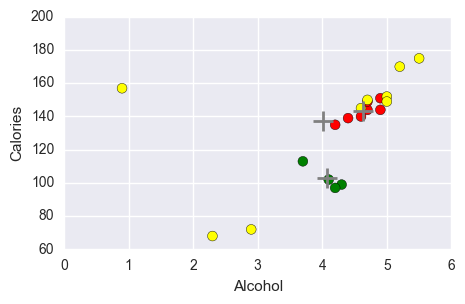

In [20]:
# set up chart parameters and create a colour palette for the clusters
plt.rcParams['font.size'] = 14
plt.figure(figsize = (5,3))
colors = np.array(['red', 'green', 'blue', 'yellow'])

# create a scatter plot of calories versus alcohol, colored by cluster
plt.scatter(beer.alcohol, beer.calories, c = colors[beer.cluster], s = 50)

# also plot the cluster centers
plt.scatter(centers.alcohol, centers.calories, linewidths = 2, marker = '+', s = 200, c = 'grey')

# add labels
plt.xlabel('Alcohol')
plt.ylabel('Calories')

It looks like DBSCAN has not been as successful in labelling the data as K-Means was